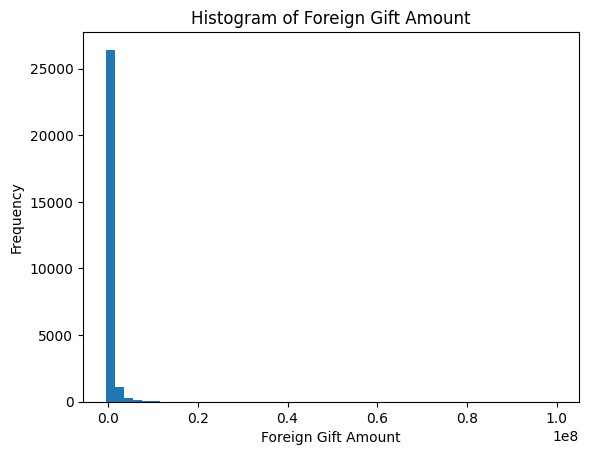

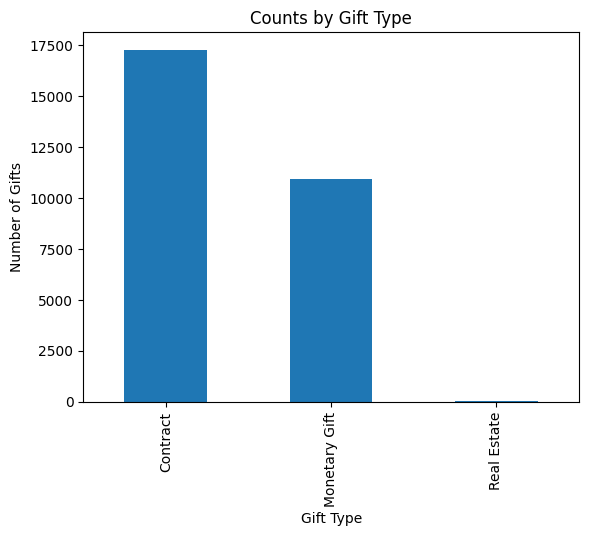

/Users/jaithajasti/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


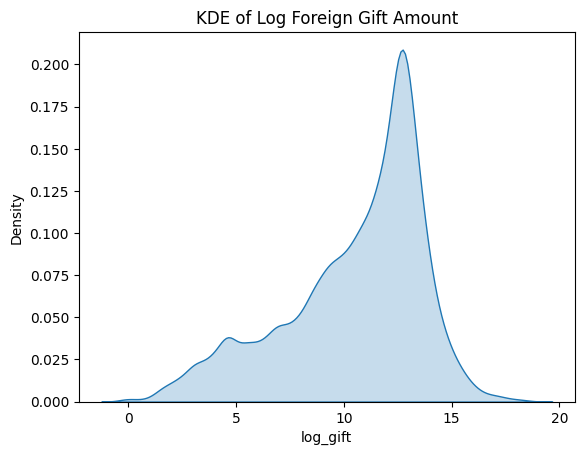

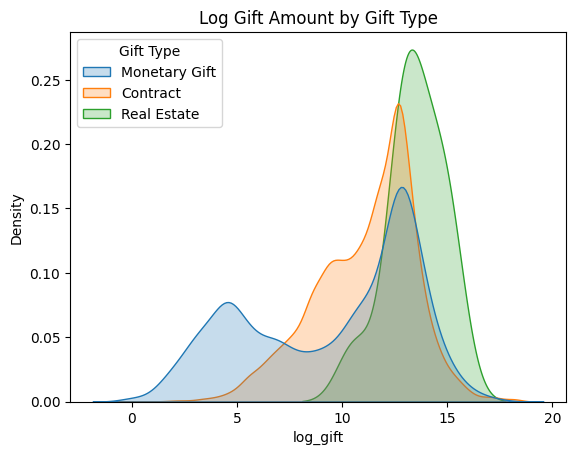

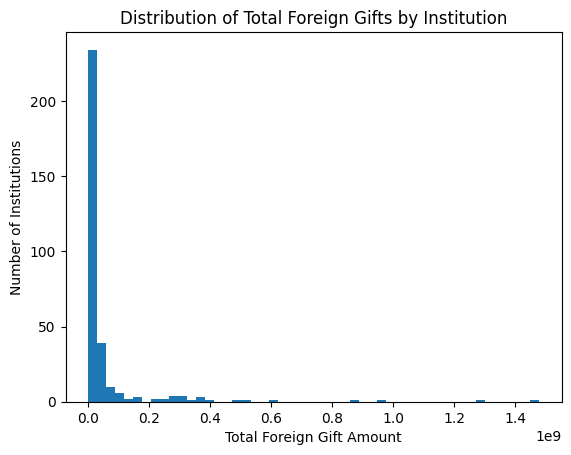

Data dimensions (rows, columns): (30478, 13)

Variables:
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22   

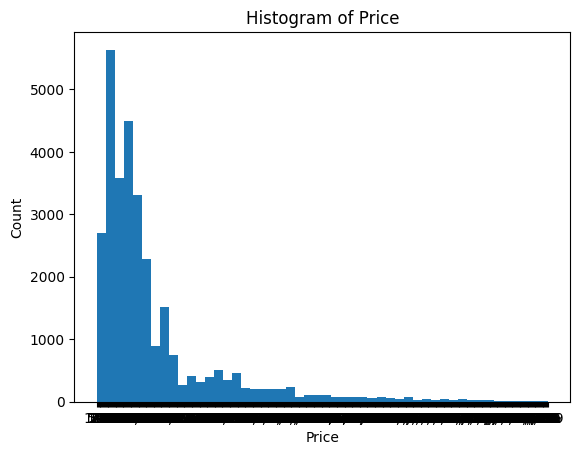

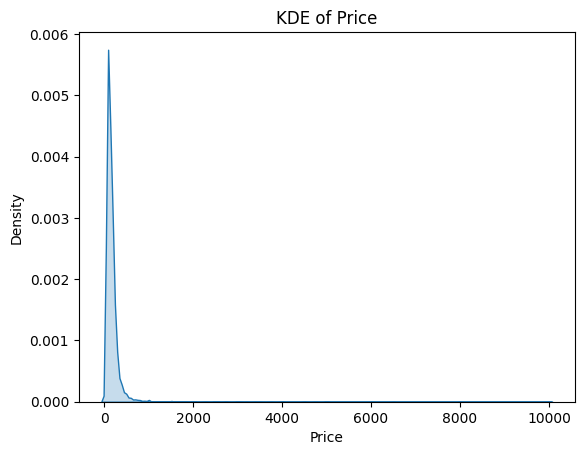

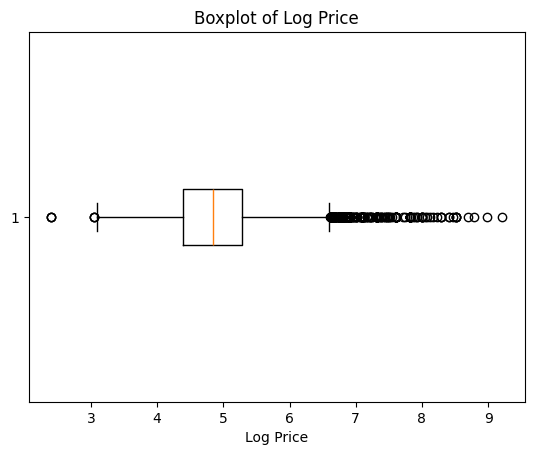

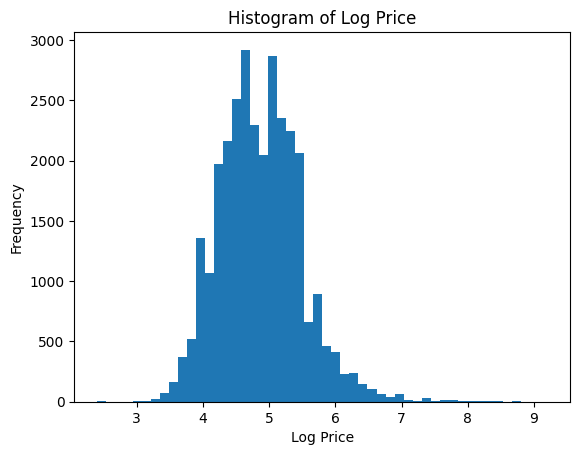

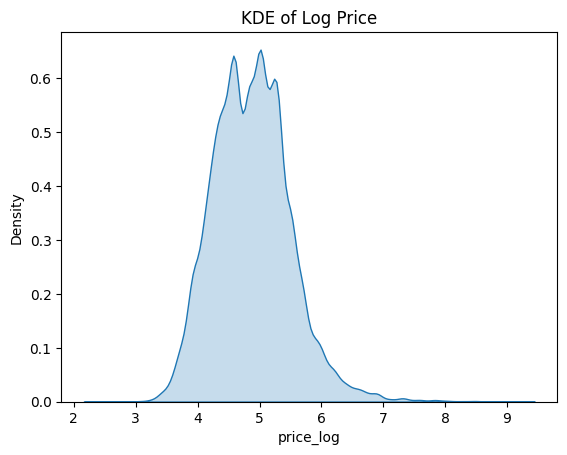

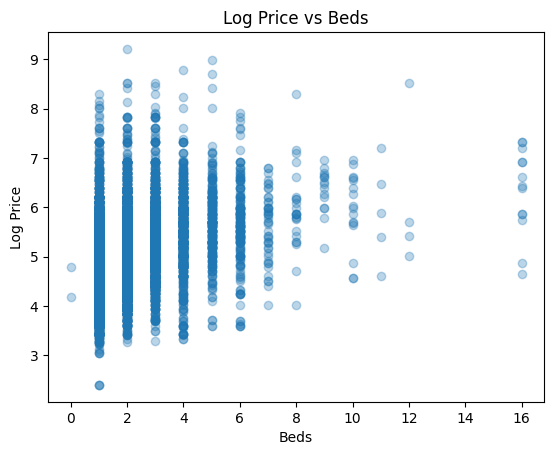

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

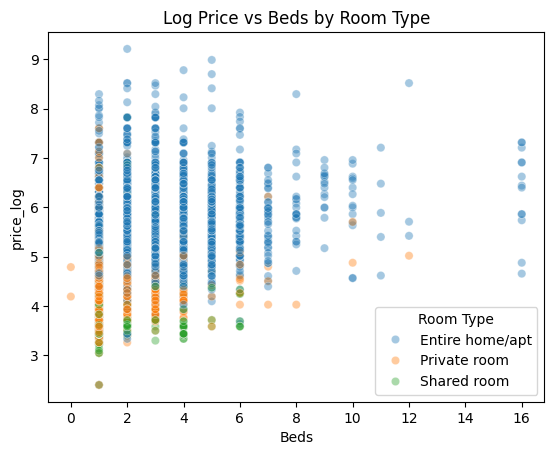

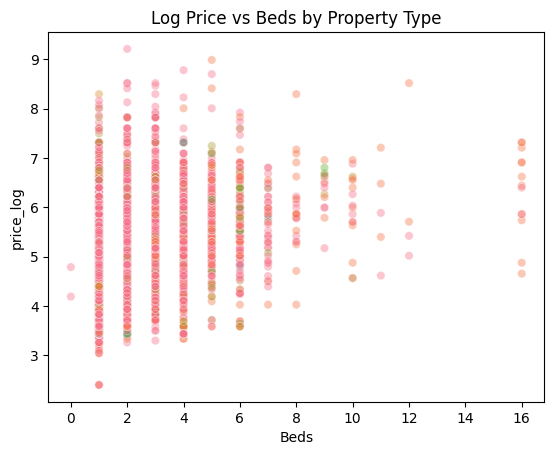

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

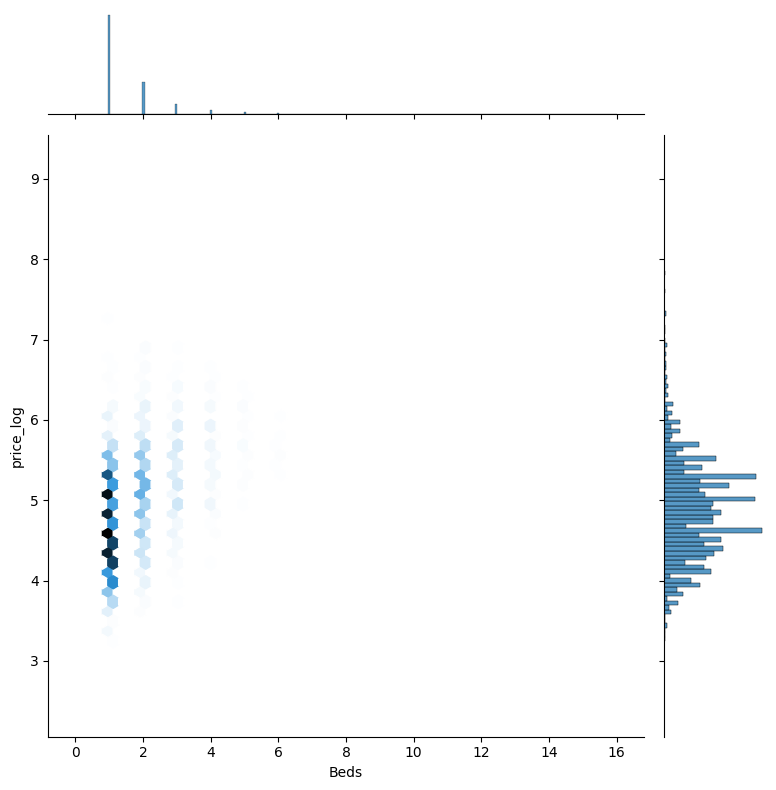

Shape (rows, columns): (623, 10)

Columns:
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')

Data types:
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Ope

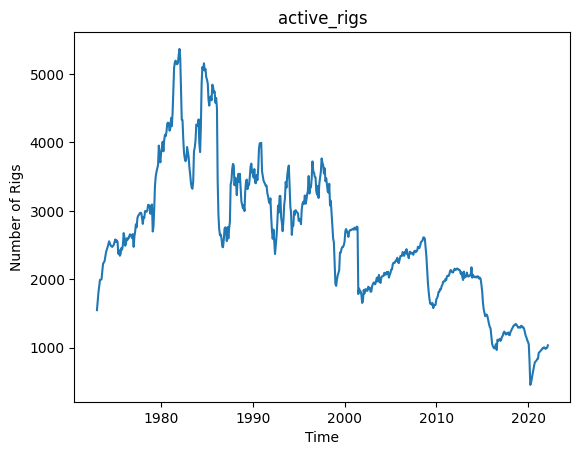

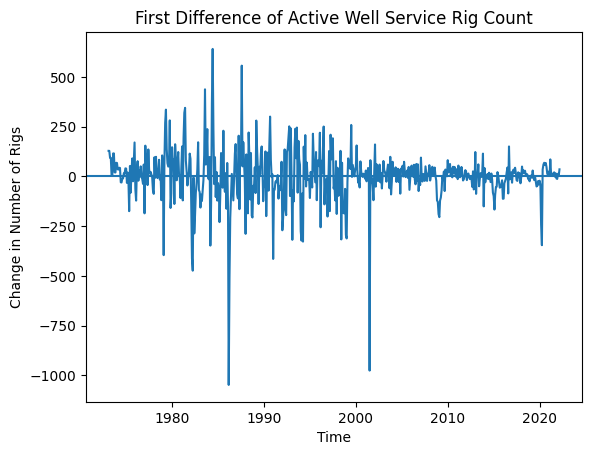

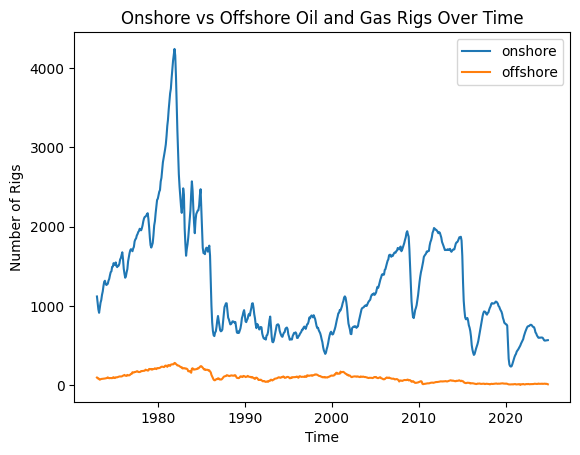

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#This assignment was done using the help of Chat GPT
#Question 1.1
df = pd.read_csv("ForeignGifts_edu.csv")
#Question 1.2 
df.head()
df.shape
df["Foreign Gift Amount"] = (
    df["Foreign Gift Amount"]
    .replace("[\$,]", "", regex=True)
    .astype(float)
)
plt.figure()
plt.hist(df["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amount")
plt.show()
gift_counts = df["Gift Type"].value_counts()
gift_counts
gift_counts / gift_counts.sum()
# I noticed that "Foreign Gift Amount" has some extremely high values, which could skew the analysis.
#Question 1.3
gift_counts.plot(kind="bar")
plt.title("Counts by Gift Type")
plt.ylabel("Number of Gifts")
plt.show()
# the proportion of gifts that are contracts appear to be much larger than other types of gifts

#Question 1.4
df["log_gift"] = np.log(df["Foreign Gift Amount"])
plt.figure()
sns.kdeplot(df["log_gift"].dropna(), fill=True)
plt.title("KDE of Log Foreign Gift Amount")
plt.show()

plt.figure()
sns.kdeplot(
    data=df,
    x="log_gift",
    hue="Gift Type",
    fill=True,
    common_norm=False
)
plt.title("Log Gift Amount by Gift Type")
plt.show()
#I noticed that the graphs are mainly concentrated right side of the graph. It seems the points are more denser between 10 and 15 on the x axis.

#Question 1.5
top_countries_count = (
    df.groupby("Country of Giftor")
      .size()
      .sort_values(ascending=False)
      .head(15)
)

top_countries_count

top_countries_amount = (
    df.groupby("Country of Giftor")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_countries_amount

#Question 1.6
top_institutions = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_institutions

institution_totals = (
    df.groupby("Institution Name")["Foreign Gift Amount"].sum()
)

plt.figure()
plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts by Institution")
plt.show()

#Question 1.7
top_giftors = (
    df.groupby("Giftor Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)
top_giftors
# Top giftors are : Qatar Foundation                       1.166504e+09
#Qatar Foundation/Qatar National Res    7.961970e+08
#Qatar Foundation for Education         3.739452e+08
#Anonymous                              3.387936e+08
#Saudi Arabian Cultural Mission         2.752215e+08
#HCL                                    1.900000e+08
#Church of Jesus Christ of LDS          1.852037e+08

#Question 3
#Question 3.1
# Load data
df = pd.read_csv("airbnb_hw.csv")

#Question 3.2
# Dimensions
print("Data dimensions (rows, columns):", df.shape)

# Variables
print("\nVariables:")
print(df.columns)

#Question 3.3
# First few rows
df.head()
room_property_ct = pd.crosstab(df["Room Type"], df["Property Type"])
print(room_property_ct)
# Basic description
print(df["Price"].describe())
plt.figure()
plt.hist(df["Price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of Price")
plt.show()
df["Price"].dtype

#Question 3.4
#Remove $ and commas if present, then convert
df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

plt.figure()
sns.kdeplot(df["Price"], fill=True)
plt.title("KDE of Price")
plt.show()
plt.figure()

df["price_log"] = np.log1p(df["Price"])
plt.boxplot(df["price_log"], vert=False)
plt.xlabel("Log Price")
plt.title("Boxplot of Log Price")
plt.show()

# Histogram
plt.figure()
plt.hist(df["price_log"].dropna(), bins=50)
plt.title("Histogram of Log Price")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

# KDE
plt.figure()
sns.kdeplot(df["price_log"].dropna(), fill=True)
plt.title("KDE of Log Price")
plt.show()

# Statistical description
df["price_log"].describe()

#Question 3.5
plt.figure()
plt.scatter(df["Beds"], df["price_log"], alpha=0.3)
plt.xlabel("Beds")
plt.ylabel("Log Price")
plt.title("Log Price vs Beds")
plt.show()
price_by_beds = df.groupby("Beds")["Price"].describe()
print(price_by_beds)
#coulored by room type
plt.figure()
sns.scatterplot(
    data=df,
    x="Beds",
    y="price_log",
    hue="Room Type",
    alpha=0.4
)
plt.title("Log Price vs Beds by Room Type")
plt.show()
#Coulored by property type
plt.figure()
sns.scatterplot(
    data=df,
    x="Beds",
    y="price_log",
    hue="Property Type",
    alpha=0.4,
    legend=False  
)
plt.title("Log Price vs Beds by Property Type")
plt.show()
#grouped price descriptions
price_by_room_property = (
    df.groupby(["Room Type", "Property Type"])["Price"]
      .describe()
)

print(price_by_room_property)
#The scatterplot shows that prices generally increase with the number of beds, though there is substantial variation. Entire homes tend to have higher prices than private or shared rooms across property types. Entire homes and houses have the highest average prices and the greatest variability. Because prices are right-skewed with outliers, the median is a more reliable measure of central tendency than the mean.

#Question 3.6
#Hexbin jointplot 
sns.jointplot(
    data=df,
    x="Beds",
    y="price_log",
    kind="hex",
    height=8
)
plt.show()
#The data are heavily concentrated at low bed counts and lower prices, with relatively few high-priced or large listings. This indicates that the apparent trends in the earlier scatterplots are driven by a dense core of small properties rather than the extreme values.

#Question 4
#Question 4.1
# Load data
df = pd.read_csv("drilling_rigs.csv")

# Number of observations and variables
print("Shape (rows, columns):", df.shape)

# Variable names
print("\nColumns:")
print(df.columns)

# Data types
print("\nData types:")
print(df.dtypes)

# Look at first few rows
df.head()

numeric_cols = [
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",
    "Active Well Service Rig Count (Number of Rigs)"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.rename(columns={
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)": "onshore",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)": "offshore",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)": "total_rigs",
    "Active Well Service Rig Count (Number of Rigs)": "active_rigs"
})

df["time"] = pd.to_datetime(df["Month"], format="mixed")
#The dataset contains a time series of U.S. drilling activity with multiple observations and several variables. Initial inspection shows that some numeric variables are not read in correctly by Pandas and appear as strings due to formatting. These columns must be explicitly coerced to numeric values, with invalid entries converted to missing values. In addition, the data are cleaned by renaming long column names to simpler labels for ease of analysis. This preparation allows the data to be used for time series plotting and further analysis.

#Question 4.2
# Sort by time (important for time series)
df = df.sort_values("time")

plt.figure()
plt.plot(
    df["time"],
    df["active_rigs"]
)
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.title("active_rigs")
plt.show()

#Question 4.3
#There seems to be a sharp increase and then and overall decrease in the data for the line plot.
df["rig_diff"] = df["active_rigs"].diff()

plt.figure()
plt.plot(df["time"], df["rig_diff"])
plt.axhline(0)
plt.xlabel("Time")
plt.ylabel("Change in Number of Rigs")
plt.title("First Difference of Active Well Service Rig Count")
plt.show()
#The first difference plot shows the changes in the number of active well service rigs over time. Positive values indicate increases, while negative values indicate decreases. The plot reveals periods of both growth and decline, with some volatility in the changes. This suggests that the rig count is influenced by various factors leading to fluctuations rather than a steady trend.

#Question 4.4
df_long = df.melt(
    id_vars="time",
    value_vars=[
        "onshore",
        "offshore"
    ],
    var_name="Rig Type",
    value_name="Rig Count"
)

plt.figure()
for rig_type in df_long["Rig Type"].unique():
    subset = df_long[df_long["Rig Type"] == rig_type]
    plt.plot(subset["time"], subset["Rig Count"], label=rig_type)

plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.title("Onshore vs Offshore Oil and Gas Rigs Over Time")
plt.legend()
plt.show()